# Import Libraries 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Functions

In [117]:
def encode_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns

    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    label_encoder = LabelEncoder()

    for column in categorical_columns:
        unique_labels = df[column].nunique() 
        if unique_labels < 100:
            onehot_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[[column]]), 
                                          columns=[f'{column}_{category}' for category in onehot_encoder.categories_[0][1:]])
            df = pd.concat([df, onehot_encoded], axis=1)
            df.drop(column, axis=1, inplace=True)
        else:
            df[column] = label_encoder.fit_transform(df[column])

    return df 

# Read Dataset

In [118]:
df=pd.read_csv('C:/Users/mitev/Desktop/Prácticas/MobileDevice_proyect/dataset/user_behavior_dataset.csv')

# EDA

In [119]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [121]:
df.shape

(700, 11)

In [122]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [123]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [124]:
df[df.duplicated()]

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class


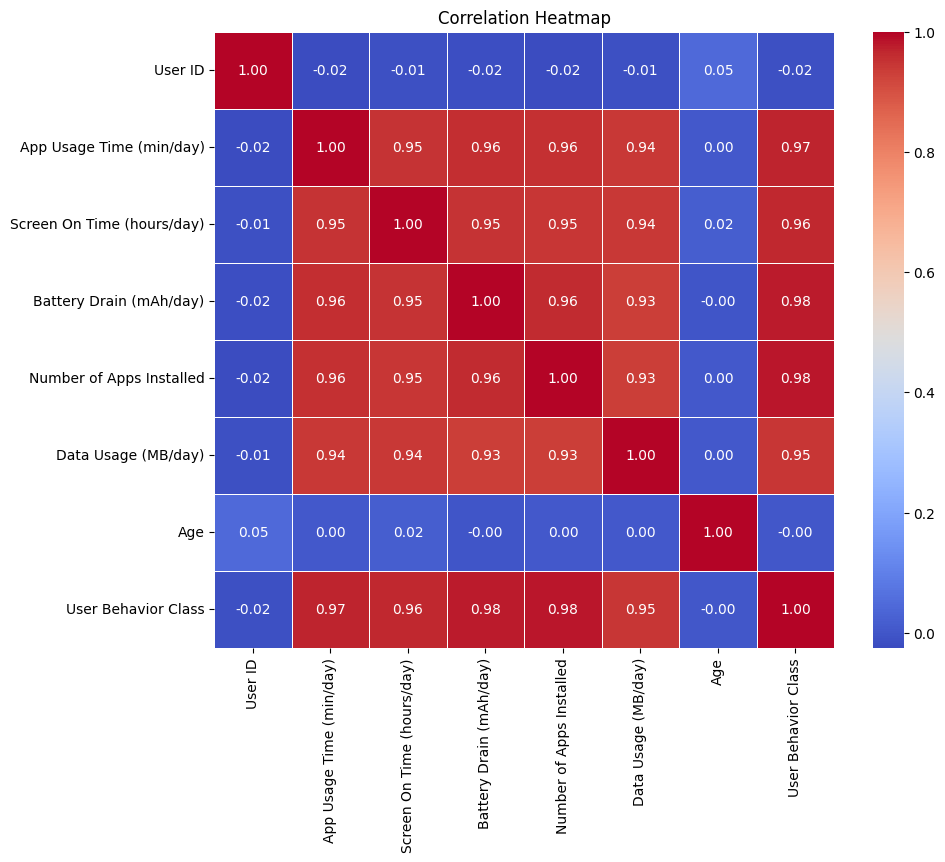

In [125]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

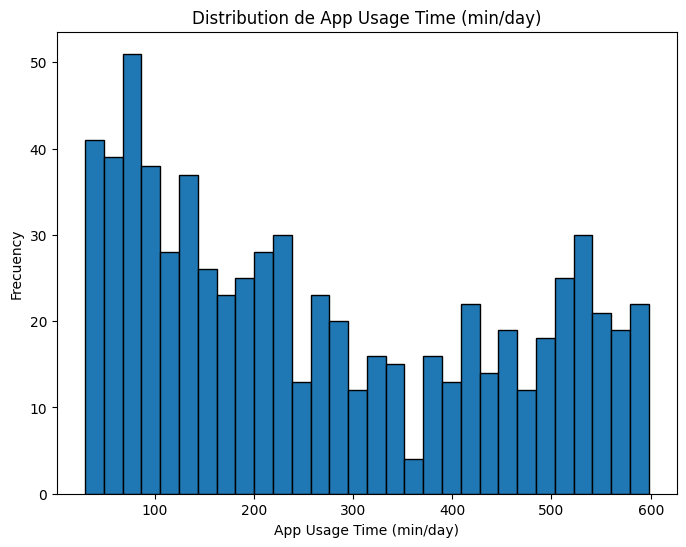

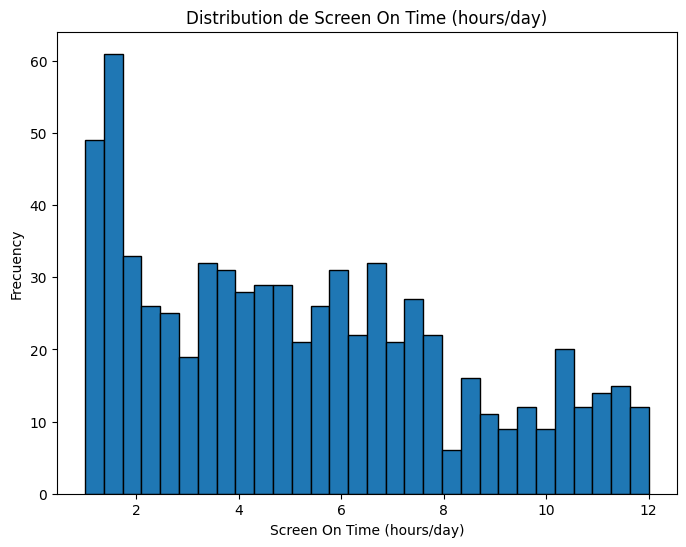

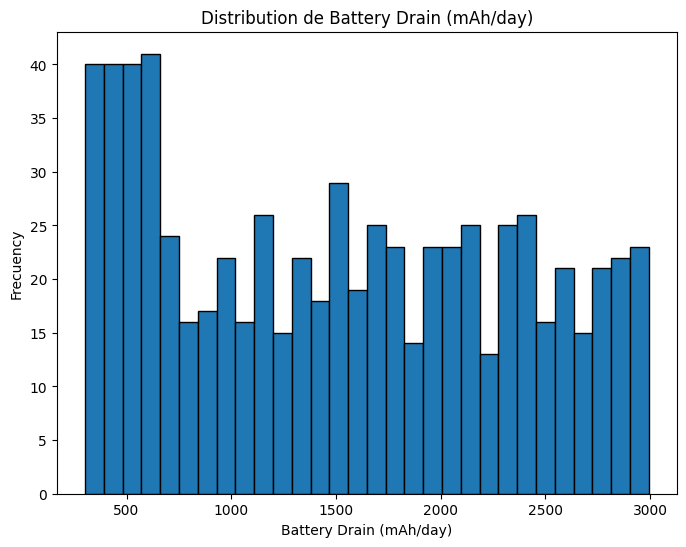

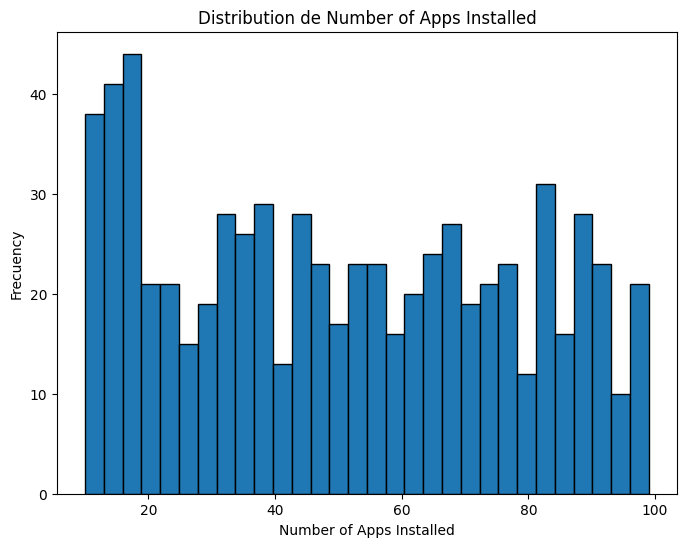

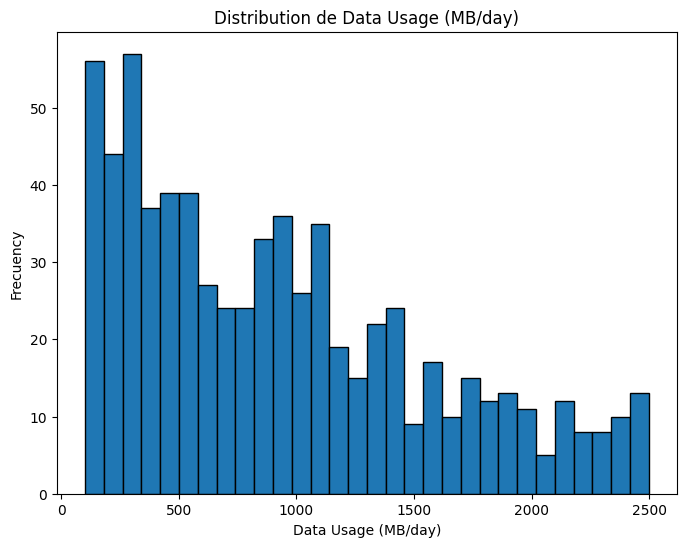

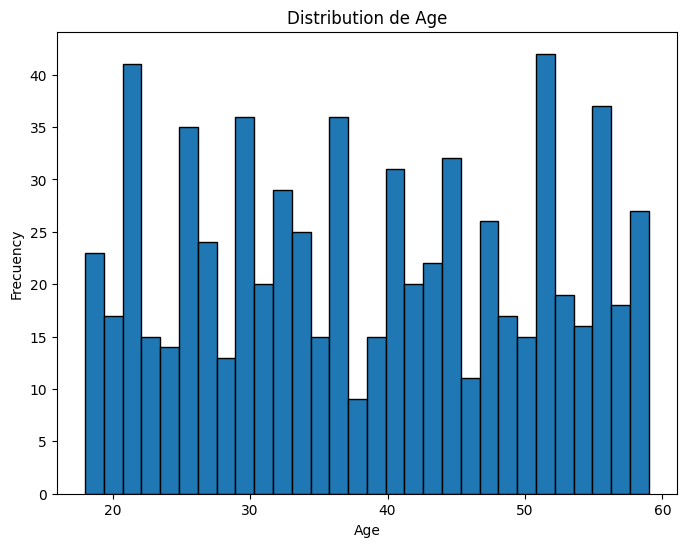

In [126]:
numeric_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                      'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                      'Data Usage (MB/day)', 'Age']

for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuency')
    plt.show()

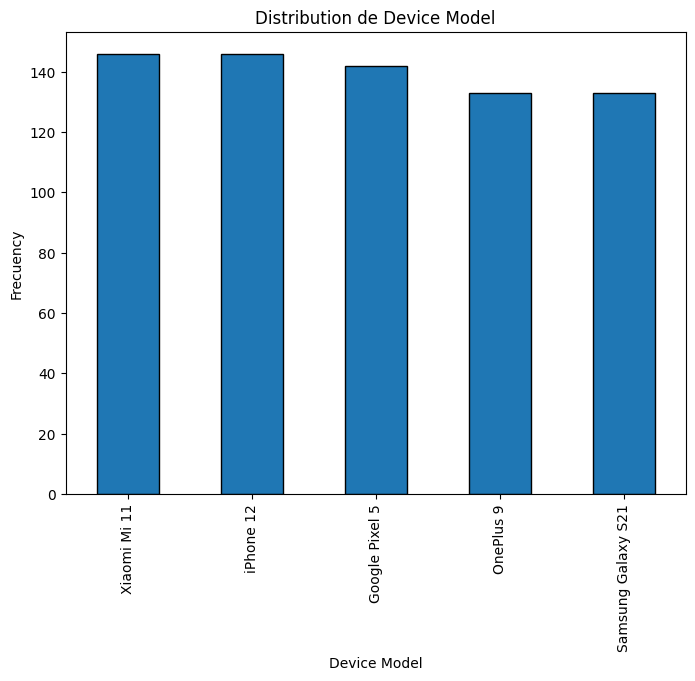

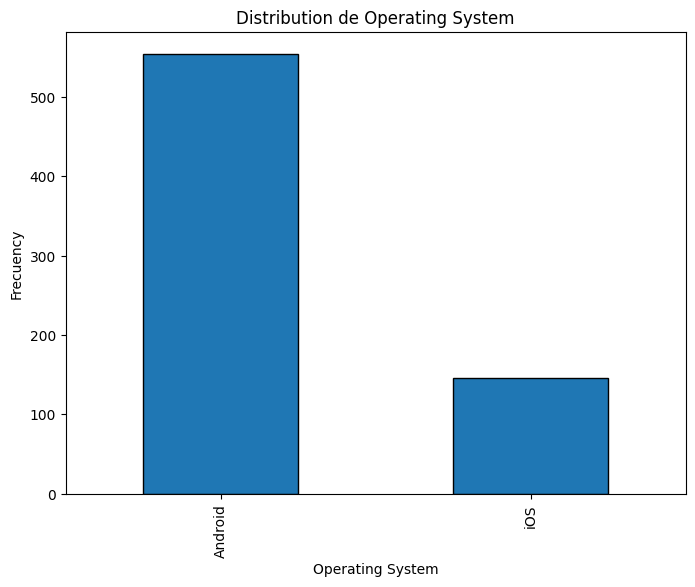

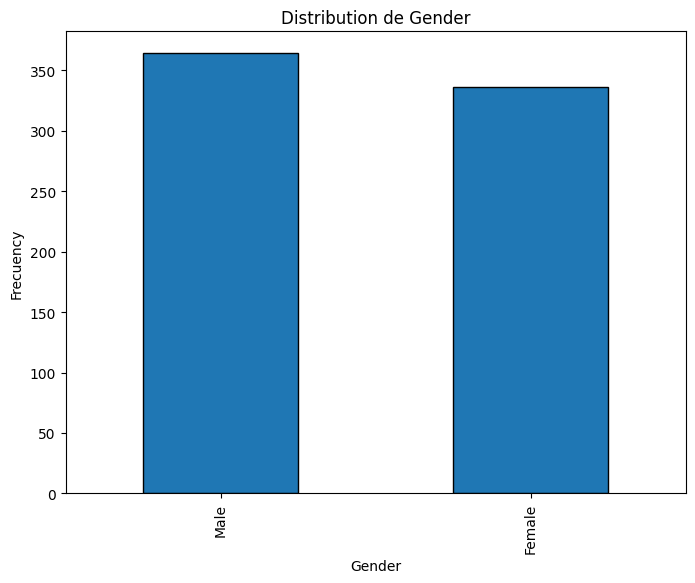

In [127]:
categoric_columns = ['Device Model', 'Operating System', 'Gender']

for column in categoric_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuency')
    plt.show()

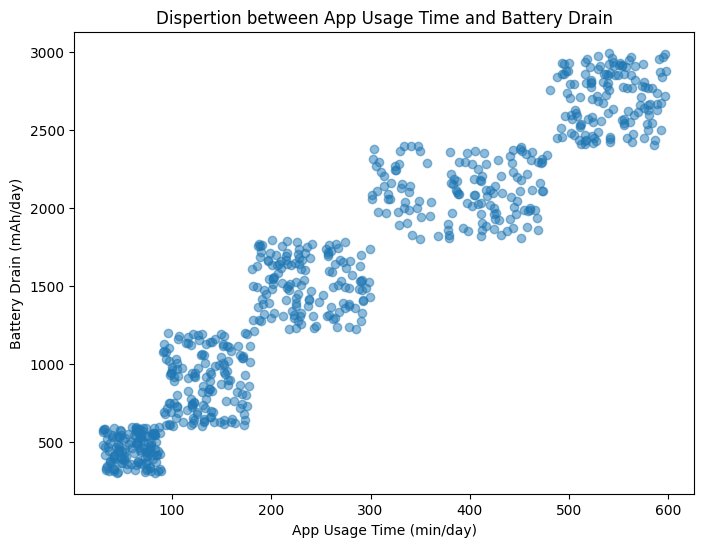

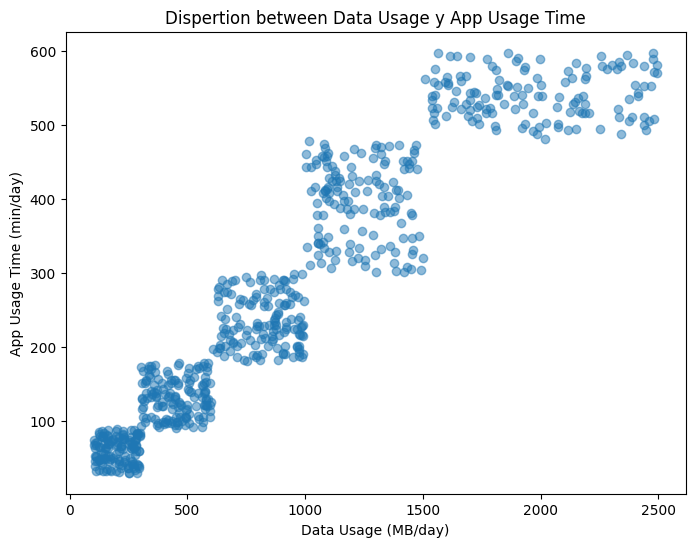

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(df['App Usage Time (min/day)'], df['Battery Drain (mAh/day)'], alpha=0.5)
plt.title('Dispertion between App Usage Time and Battery Drain')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['Data Usage (MB/day)'], df['App Usage Time (min/day)'], alpha=0.5)
plt.title('Dispertion between Data Usage y App Usage Time')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('App Usage Time (min/day)')
plt.show()

C:\Users\mitev\AppData\Local\Temp\ipykernel_3076\2564076309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df, palette='Set3')


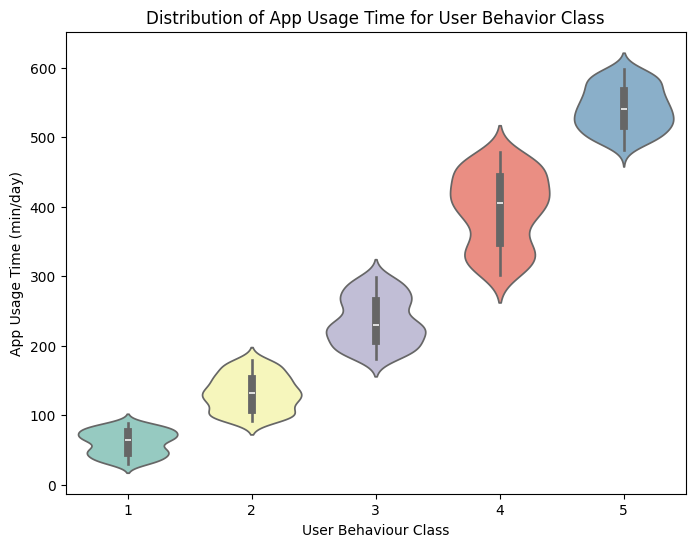

In [129]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df, palette='Set3')
plt.title('Distribution of App Usage Time for User Behavior Class')
plt.xlabel('User Behaviour Class')
plt.ylabel('App Usage Time (min/day)')
plt.show()

In [130]:
df2 = encode_categorical_columns(df)

In [131]:
df2.head()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_iOS,Gender_Male
0,1,393,6.4,1872,67,1122,40,4,0.0,0.0,0.0,0.0,0.0,1.0
1,2,268,4.7,1331,42,944,47,3,1.0,0.0,0.0,0.0,0.0,0.0
2,3,154,4.0,761,32,322,42,2,0.0,0.0,1.0,0.0,0.0,1.0
3,4,239,4.8,1676,56,871,20,3,0.0,0.0,0.0,0.0,0.0,1.0
4,5,187,4.3,1367,58,988,31,3,0.0,0.0,0.0,1.0,1.0,0.0


# MODELLING

In [132]:
X = df2.drop(columns=['User Behavior Class'])
y = df2['User Behavior Class']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Rating of model: {accuracy:.2f}")

Rating of model: 1.00


In [135]:
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



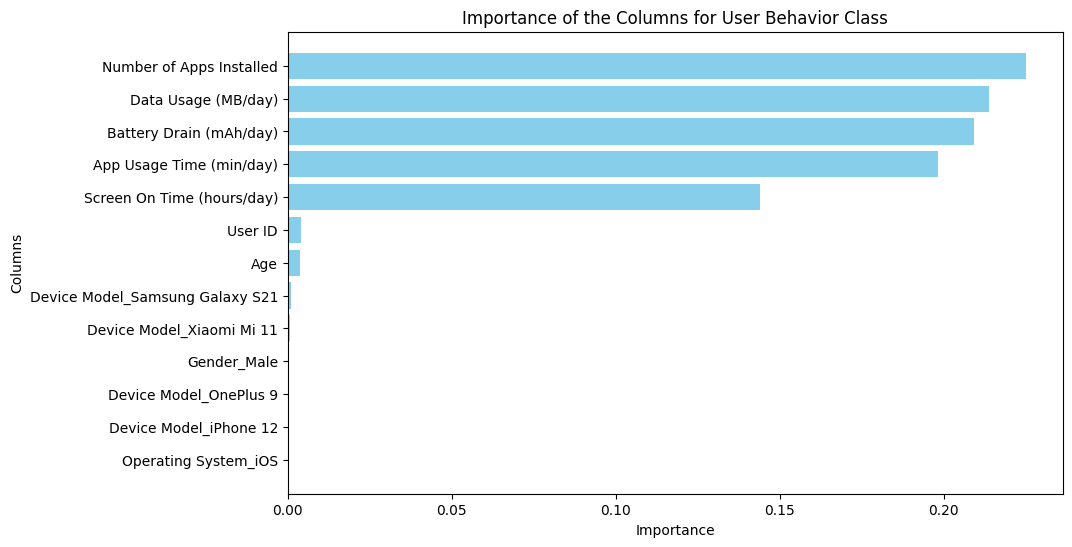

In [136]:
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Importance of the Columns for User Behavior Class')
plt.xlabel('Importance')
plt.ylabel('Columns')
plt.gca().invert_yaxis()